In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. FoodPrice dataset

In [2]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


### 1. Vẽ các biểu đồ cột so sánh giá Milk (powder, infant formula) và Fuel (gas) tháng 12 cuối năm năm 2019 của Ankara, Istanbul, Izmir và National Average.

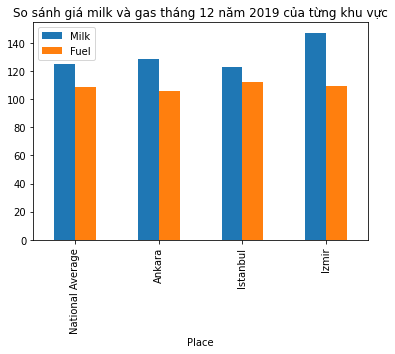

In [4]:
data1 = df[(df['ProductName'] == 'Milk (powder, infant formula) - Retail') & 
           (df['Year'] == 2019) & (df['Month'] == 12)].reset_index()
data2 = df[(df['ProductName'] == 'Fuel (gas) - Retail') & 
           (df['Year'] == 2019) & (df['Month'] == 12)].reset_index()
data = pd.DataFrame({'Place': data1['Place'],
                     'Milk' : data1['Price'],
                     'Fuel' : data2['Price']})
data.plot.bar(x = 'Place')
plt.title('So sánh giá milk và gas tháng 12 năm 2019 của từng khu vực')
plt.show()

### 2. Vẽ các biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail), giá Fuel (gas) trung bình cả nước (National Average) trong năm 2016, 2018, 2019 tại Thổ Nhĩ Kì.

In [5]:
data = df.loc[(df['ProductName'].isin(['Milk (powder, infant formula) - Retail' , 'Fuel (gas) - Retail'])) &
          (df['Place'] == 'National Average') & df['Year'] .isin([2016,2018,2019]),
          ['Year','Month', 'ProductName', 'Price']].reset_index(drop = True)
data

,Year,Month,ProductName,Price
0,2016,1,Fuel (gas) - Retail,64.5300
1,2016,2,Fuel (gas) - Retail,63.6000
2,2016,3,Fuel (gas) - Retail,63.1300
3,2016,4,Fuel (gas) - Retail,63.9000
4,2016,5,Fuel (gas) - Retail,63.6100
...,...,...,...,...
67,2019,8,"Milk (powder, infant formula) - Retail",122.8990
68,2019,9,"Milk (powder, infant formula) - Retail",123.0848
69,2019,10,"Milk (powder, infant formula) - Retail",123.3618
70,2019,11,"Milk (powder, infant formula) - Retail",123.9452


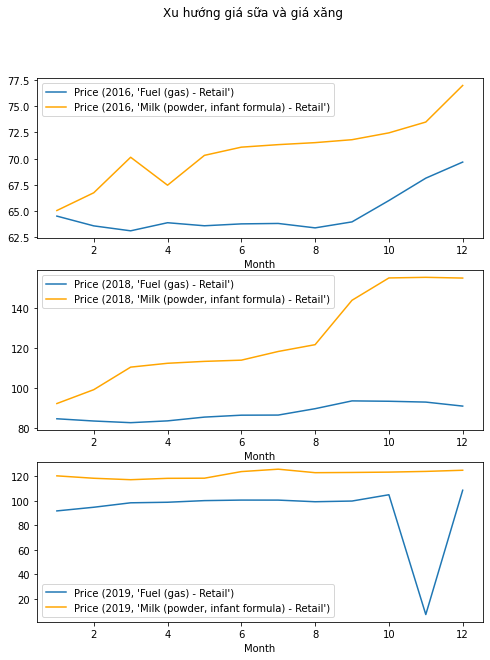

In [6]:
tmp = data.groupby(['Year', 'ProductName'])
keys = []
groups = []
for key, group in tmp:
    keys.append(key)
    groups.append(pd.DataFrame(group))

fig, axs = plt.subplots(3,1,figsize = (8,10))
idx = 0
loop = 0
while loop < 6:
    groups[loop].plot.line(x = 'Month', y = 'Price', ax = axs[idx], label = 'Price ' + str(keys[loop]))
    loop += 1
    groups[loop].plot.line(x = 'Month', y = 'Price', ax = axs[idx], label = 'Price ' + str(keys[loop]), color = 'orange')
    loop += 1; idx += 1
plt.suptitle('Xu hướng giá sữa và giá xăng') 
plt.show()

## 2. Online Retail

In [17]:
df = pd.read_csv('Data/OnlineRetail.csv', encoding='ISO-8859-1')

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] > 0)]
df['Total'] = df['Quantity'] * df['UnitPrice']

### -  Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.
### - Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

In [20]:
total_data = df.groupby(by = df['InvoiceDate'].dt.month)[['Total']].sum()
quantity_data = df.groupby(by = df['InvoiceDate'].dt.month)[['Quantity']].sum()
idx = quantity_data.index.get_level_values(0)

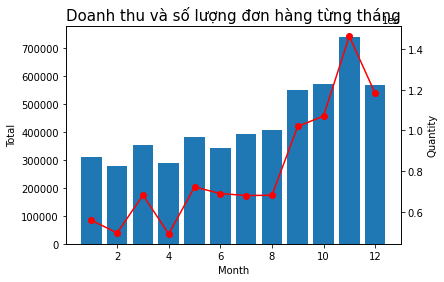

In [31]:
plt.bar(idx,quantity_data['Quantity'])
axs1 = plt.gca()
axs2 = axs1.twinx()
axs2.plot(idx, total_data['Total'], color = 'red', marker = 'o')
axs1.set_ylabel('Total')
axs2.set_ylabel('Quantity')
axs1.set_xlabel('Month')
plt.title('Doanh thu và số lượng đơn hàng từng tháng', fontsize = 15)
plt.show()